### Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import data

In [4]:
# Create path
path = r'C:\Users\nanh9\Instacart Basket Analysis'

In [5]:
# Importing orders_products_merged_derived.pkl File
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'aggregated_ords_prods_merge.pkl'))

### Creating bar charts

<Axes: xlabel='orders_day_of_week'>

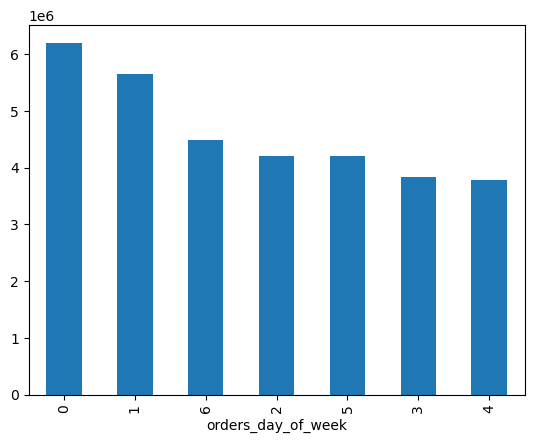

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

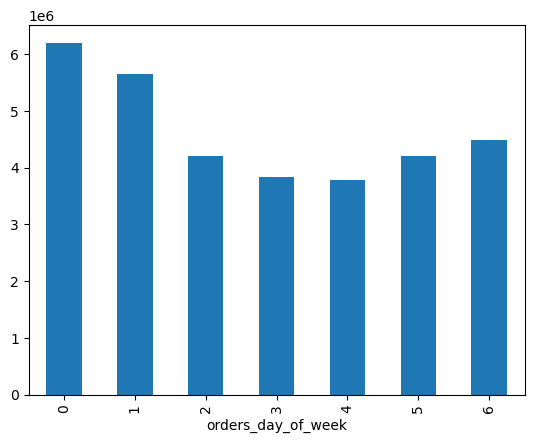

In [8]:
# Sort by index from 0-6
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# works for printing as well
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6203329
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: count, dtype: int64

In [10]:
# works for printing as well
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6203329
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: count, dtype: int64

### recreate mapping

Text(0, 0.5, 'number of orders')

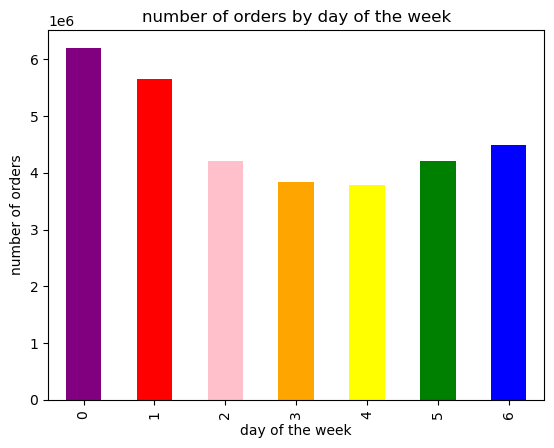

In [12]:
# Create bar-chart with color argument
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('number of orders by day of the week')
plt.xlabel('day of the week')
plt.ylabel('number of orders')

### Exporting Charts

In [14]:
# Export preview into visualization folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms & Scatterplots

<Axes: ylabel='Frequency'>

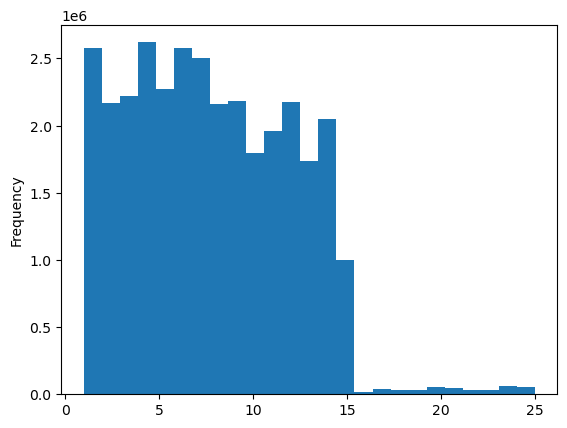

In [16]:
# Create histogram of the "prices" column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
# Data consistency checks
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [18]:
# Further investigation
ords_prods_merge['prices'].mean()

7.790994092173341

In [19]:
ords_prods_merge['prices'].median()

7.4

In [20]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

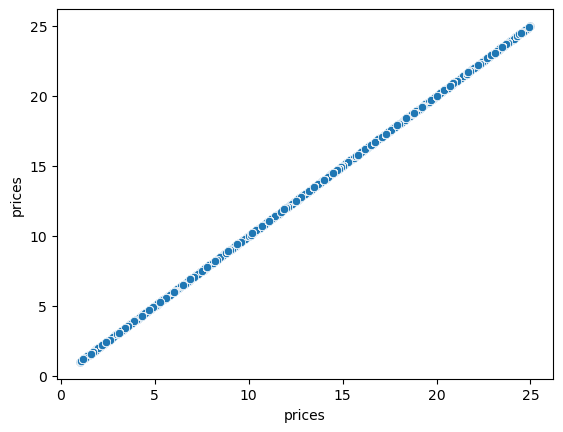

In [21]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag


In [23]:
# Turn any value above 100 into NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
# Check max-value
ords_prods_merge['prices'].max()

25.0

##### Histogram 1

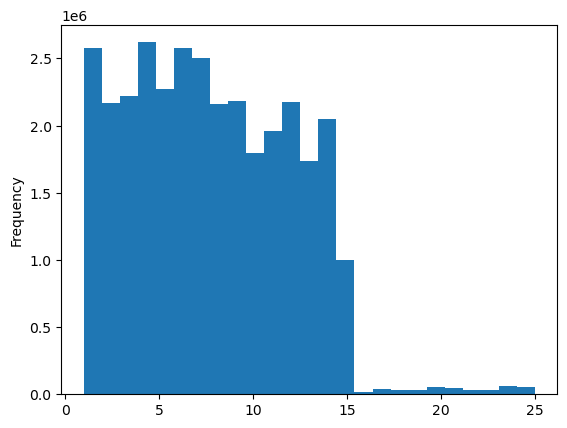

In [26]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

##### Histogram 2

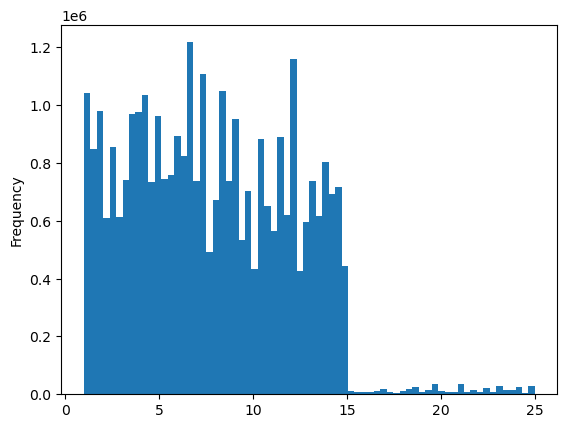

In [28]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

### Creating line charts

In [30]:
# consider the first 2000000 rows of dataframe
df = ords_prods_merge[:2000000]

### Sampling data

In [32]:
# 70/30 split: any rows assigned number below 0.7 are placed in one sample, while those greater than 0.7 are placed in other

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
dev

array([False,  True, False, ..., False,  True,  True])

In [34]:
np.random.rand(10)

array([0.23055224, 0.64519968, 0.82012101, 0.90021919, 0.2001039 ,
       0.0323489 , 0.7061233 , 0.10883532, 0.00193764, 0.89102284])

In [35]:
# Create samples from ords_prods_merge dataframe
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

- store 70% into the big data sample and 30% into small data sample

In [37]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [38]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [39]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

##### Use len() function

In [41]:
len(ords_prods_merge)

32399732

In [42]:
len(big) + len(small)

32399732

In [43]:
# Create chart:  only necessary columns (prices, orders_day_of_week)
df_2 = small[['orders_day_of_week','prices']]

Text(0, 0.5, 'prices')

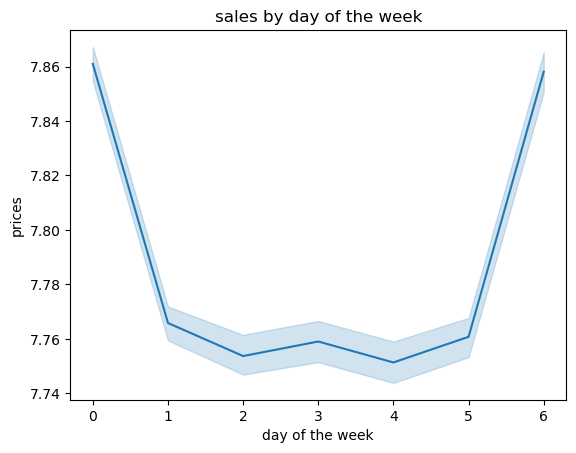

In [44]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.title('sales by day of the week')
plt.xlabel('day of the week')
plt.ylabel('prices')

In [77]:
# Export preview into visualization folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))